**Версии библиотек:**

- pandas 2.1.4
- numpy 1.26.4
- statsmodels 0.14.0
- seaborn 0.13.2
- matplotlib 3.8.0
- scikit-learn 1.2.2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import statsmodels as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

import random

RANDOM_STATE = 42

In [4]:
def metrics_report(y_true, y_pred):
    print(f'R2 score: {r2_score(y_true, y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true, y_pred)**0.5}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

#### Задание 1


Линейная регрессия позволяет проверить гипотезу об отличии коэффициента от нуля.

Пусть имеется набор данных о стоимости какого-то товара. В таблице две колонки: значение некоторой характеристики товара и его стоимость в рублях. Постройте линейную регрессию из sklearn и statsmodels и выберите все верные ответы.

In [4]:
# Загрузите данные из файла task0.csv и выведите первые 5 строк на экран
df = pd.read_csv('task0.csv', index_col=0) # ваш код здесь
print(df.shape)
df.head(5)

(1000, 2)


,feature,cost
0,18.189092,12169
1,4.862900,19431
2,5.874894,10816
3,99.297459,7779
4,59.958159,19862


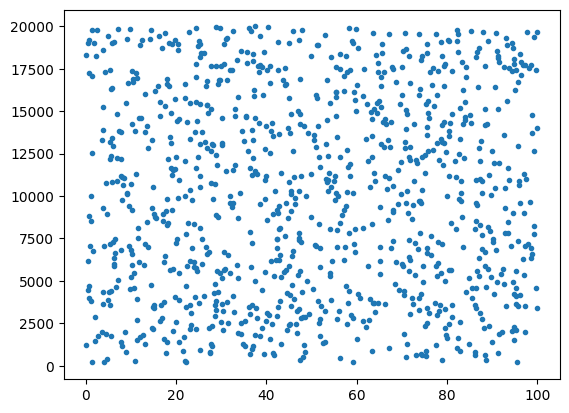

In [22]:
# Постройте scatterplot
plt.scatter(
    x=df['feature'], # ваш код здесь,
    y=df['cost'], # ваш код здесь
    marker='.'
)
plt.show()

In [10]:
# Постройте модель линейной регрессии из sklearn, обучите ее на всем датафрейме и выведите на экран коэффициенты
lin_reg = LinearRegression()

# ваш код здесь
lin_reg.fit(df[['feature']], df['cost'])
y_pred = lin_reg.predict(df[['feature']])
print(lin_reg.coef_, lin_reg.intercept_) # coef - коэффициенты, intercept - свободный член

[6.06584418] 9765.480136229104


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(df['cost'], y_pred)
print(f'R2 score: {r2}')
lin_reg.coef_

R2 score: 0.000893426341328496


array([6.06584418])

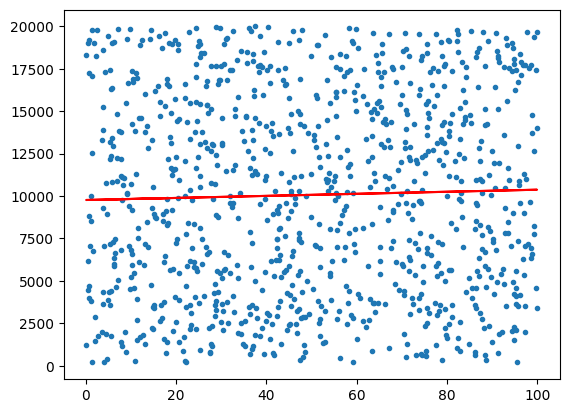

In [11]:
# График предсказаний регрессии
plt.scatter(x=df['feature'], y=df['cost'], marker='.')
plt.plot(df['feature'], y_pred, color='r')
plt.show()

In [27]:
# Теперь постройте регрессию из statsmodels. Но прежде чем это сделать, необходимо добавить в выборку константу с помощью функции sm.add_constant().
# Это необходимое техническое действие, без которого предсказания модели будут некорректными

X_sm = sm.add_constant(df['feature']) # ваш код здесь
X_sm.head()

,const,feature
0,1.0,18.189092
1,1.0,4.862900
2,1.0,5.874894
3,1.0,99.297459
4,1.0,59.958159


In [28]:
# Постройте и обучите модель. Выведите результаты обучения (summary). После этого заполните ответ в форме.

ols_model = sm.OLS(df['cost'], X_sm) # ваш код здесь
ols_res = ols_model.fit() # ваш код здесь
y_pred = ols_res.predict(X_sm)
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8924
Date:                Mon, 17 Feb 2025   Prob (F-statistic):              0.345
Time:                        22:23:51   Log-Likelihood:                -10085.
No. Observations:                1000   AIC:                         2.017e+04
Df Residuals:                     998   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9765.4801    370.682     26.345      0.0

In [29]:
r_squared = ols_res.rsquared
print(f'Коэффициент детерминации (R²): {r_squared}')
ols_res.params

Коэффициент детерминации (R²): 0.000893426341328496


const      9765.480136
feature       6.065844
dtype: float64

In [23]:
print(lin_reg.coef_, lin_reg.intercept_)

[6.06584418] 9765.480136229104


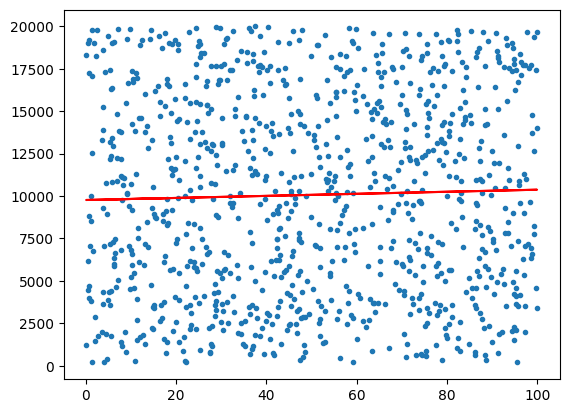

In [17]:
plt.scatter(x=df['feature'], y=df['cost'], marker='.')
plt.plot(df['feature'], y_pred, color='r')
plt.show()

#### Задание 2


Проверим предположение о необходимости репрезентативности выборки. Например, ограничим данные и сравним качество прогноза на полной и ограниченной выборках.

Пусть имеется набор данных о продажах домов. Рассмотрим две выборки, обучим на них модель линейной регрессии и сравним результаты. Первая выборка должна включать в себя только данные о домах, в которых не более 2 спальных комнат. Вторая выборка будет включать в себя все типы домов. Построить регрессию из statsmodels и в качестве ответа предоставить значения коэффициентов детерминации в обоих случаях (округлить до 3 знака)

Формат ответа: 0.333 0.342

In [18]:
# Считайте данные из файла house_prices.csv и выведите первые 5 строк на экран
data = pd.read_csv('house_prices.csv') # ваш код здесь
print(data.shape)
data.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Создайте списки категориальных и количественных переменных (целевую переменную в списки не включать)
var_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # ваш код здесь
var_numeric = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # ваш код здесь

In [ ]:
# Сделайте две выборки, описанные в задании
X1 = data[data['bedrooms'] < 3]
X2 = data # ваш код здесь
y1 = X1['price']
y2 = X2['price'] # ваш код здесь

In [20]:
# Закодируйте категориальные признаки (там, где значения 'yes'/'no', просто замените из на 1/0, остальное - с помощью OneHotEncoder())
X1[var_categorical] = X1[var_categorical].replace({'yes': 1, 'no': 0}) # ваш код здесь
X2[var_categorical] = X2[var_categorical].replace({'yes': 1, 'no': 0}) # ваш код здесь
# ваш код здесь (кодировка бинарных признаков)
# X1 = pd.get_dummies(X1, columns=['furnishingstatus'], drop_first=True) # ваш код здесь
# X2 = pd.get_dummies(X2, columns=['furnishingstatus'], drop_first=True) # ваш код здесь

In [21]:
# Кодировка остальных категориальных признаков
encoder1 = OneHotEncoder(handle_unknown='ignore')

furnished_enc_1 = pd.DataFrame(
    encoder1.fit_transform(X1[['furnishingstatus']]).toarray(),
    columns=encoder1.categories_
)

encoder2 = OneHotEncoder(handle_unknown='ignore') # ваш код здесь

furnished_enc_2 = pd.DataFrame(
    encoder2.fit_transform(X2[['furnishingstatus']]).toarray(),
    columns=encoder2.categories_
) # ваш код здесь

In [23]:
furnished_enc_2.head()

,furnished,semi-furnished,unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [24]:
# Теперь масштабируйте количественные признаки
scaler1 = StandardScaler()

X1_numeric = pd.DataFrame(
    scaler1.fit_transform(X1[var_numeric]),
    columns=var_numeric
)

scaler2 = StandardScaler() # ваш код здесь

X2_numeric = pd.DataFrame(
    scaler2.fit_transform(X2[var_numeric]),
    columns=var_numeric
) # ваш код здесь

In [69]:
X1_numeric

,area,bedrooms,bathrooms,stories,parking
0,2.215891,0.121268,-0.248069,-0.390279,0.719969
1,4.464476,0.121268,-0.248069,-0.390279,0.719969
2,1.029138,0.121268,4.031129,6.634747,-0.679407
3,1.107214,0.121268,-0.248069,-0.390279,2.119344
4,1.133239,0.121268,-0.248069,-0.390279,2.119344
...,...,...,...,...,...
133,-0.657301,0.121268,-0.248069,-0.390279,0.719969
134,-0.506875,0.121268,-0.248069,-0.390279,-0.679407
135,-0.849888,0.121268,-0.248069,-0.390279,0.719969
136,-0.844683,0.121268,-0.248069,-0.390279,2.119344


In [25]:
# Соберите все в один датафрейм
X1_enc = X1_numeric.join([furnished_enc_1, X1[var_categorical].reset_index(drop=True)]) #.drop('furnishingstatus', axis=1)
print(X1_enc.shape)
X1_enc.head()

(138, 14)


,area,bedrooms,bathrooms,stories,parking,"(furnished,)","(semi-furnished,)","(unfurnished,)",mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,2.215891,0.121268,-0.248069,-0.390279,0.719969,0.0,1.0,0.0,1,0,0,0,1,0
1,4.464476,0.121268,-0.248069,-0.390279,0.719969,1.0,0.0,0.0,1,0,1,1,0,0
2,1.029138,0.121268,4.031129,6.634747,-0.679407,1.0,0.0,0.0,1,0,1,0,0,1
3,1.107214,0.121268,-0.248069,-0.390279,2.119344,1.0,0.0,0.0,1,1,1,0,0,1
4,1.133239,0.121268,-0.248069,-0.390279,2.119344,1.0,0.0,0.0,1,1,1,0,0,0


In [26]:
X2_enc = X2_numeric.join([furnished_enc_2, X2[var_categorical].reset_index(drop=True)]) # ваш код здесь
print(X2_enc.shape)
X2_enc.head()

(545, 14)


,area,bedrooms,bathrooms,stories,parking,"(furnished,)","(semi-furnished,)","(unfurnished,)",mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.0,0.0,0.0,1,0,0,0,1,1
1,1.757010,1.403419,5.405809,2.532024,2.679409,1.0,0.0,0.0,1,0,0,0,1,0
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.0,1.0,0.0,1,0,1,0,0,1
3,1.083624,1.403419,1.421812,0.224410,2.679409,1.0,0.0,0.0,1,0,1,0,1,1
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1.0,0.0,0.0,1,1,1,0,1,0


In [27]:
# Для удобства переименуйте колонки, получившиеся при кодировании признака 'furnishingstatus' и удалите одну лишнюю ('unfurnished')
X1_enc = X1_enc.rename(columns={('semi-furnished',): 'semi-furnished', ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X2_enc = X2_enc.rename(columns={('semi-furnished',): 'semi-furnished', ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь

In [45]:
X1_enc.head(1)

,const,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.0,2.215891,0.121268,-0.248069,-0.390279,0.719969,0.0,1.0,1,0,0,0,1,0


In [44]:
# К обеим выборкам добавьте константу для работы с моделями из statsmodels, затем выполните сброс индексов в обеих сериях целевой переменной
# ваш код здесь
X1_enc = sm.add_constant(X1_enc)
X2_enc = sm.add_constant(X2_enc)

y1_d = y1.reset_index(drop=True) # ваш код здесь
y2_d = y2.reset_index(drop=True)# ваш код здесь

In [46]:
# Постройте модели, обучите их на соответствующих выборках и выведите информацию о моделях
ols1 = sm.OLS(y1_d, X1_enc) # ваш код здесь
ols1_res = ols1.fit() # ваш код здесь
print(ols1_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     17.69
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.83e-22
Time:                        20:51:20   Log-Likelihood:                -2030.0
No. Observations:                 138   AIC:                             4088.
Df Residuals:                     124   BIC:                             4129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.877e+06   1.59e+05     

In [47]:
ols2 = sm.OLS(y2_d, X2_enc) # ваш код здесь
ols2_res = ols2.fit() # ваш код здесь
print(ols2_res.summary()) # ваш код здесь

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          9.07e-123
Time:                        20:52:14   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.506e+06   1.46e+05     

In [54]:
# Вызвав функцию metrics_report, определенную в начале ноутбука, выведите на экран значения метрик
# при предсказании обеих моделей на полном наборе данных (то есть на выборке с номером 2)
metrics_report(y2_d, ols1_res.predict(X2_enc)) # ваш код здесь

R2 score: 0.2780547570913927
RMSE: 1587804.4707838504
MAPE: 0.19315283445870218


In [55]:
metrics_report(y2_d, ols2_res.predict(X2_enc)) # ваш код здесь

R2 score: 0.6818018485540142
RMSE: 1054128.892633344
MAPE: 0.17193151915655336


In [ ]:
# Введите ответ в форме

#### Задание 3

Еще одно предположение, выполнение которого сильно влияет на результат работы линейной регрессии, - это предположение о строгой экзогенности. Суть заключается в следующем. Предположим, было составлено уравнение регрессии, в котором целевой признак `'y'` определяется признаком `'x'` и некоторой константой. Предположим также, что существует некоторый фактор `'t'`, который влияет и на `'x'`, и на `'y'`, однако в уравнении не присутствует. Это может быть какой-то невидимый нам, неявный фактор. Получается, что наше уравнение является неполным, не описывает картину в целом.

Пусть имеется набор данных из трех колонок: два признака (`'x'` и `'t'`) и таргет `'y'`. Необходимо (а) построить регрессию, используя только `'x'` и `'y'`; (б) построить регрессию на `'t'` и `'y'`. В качестве ответа выбрать верные значения коэффициентов детерминации

In [56]:
# Создание нормально распределенного шума
rng = np.random.RandomState(RANDOM_STATE)
mu, sigma = 0, 0.1
eps = rng.normal(mu, sigma, size=1000)

In [57]:
c_train = 0
c_test = 0.1

In [58]:
# Создание набора данных
t = np.linspace(0, 1, 1000)

y = np.log(1 + t)
x = t + eps

df = pd.DataFrame({'t' : t, 'x' : x, 'y' : y})
df.head()

,t,x,y
0,0.000000,0.049671,0.000000
1,0.001001,-0.012825,0.001001
2,0.002002,0.066771,0.002000
3,0.003003,0.155306,0.002999
4,0.004004,-0.019411,0.003996


In [59]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df[['x', 't']], df['y'], test_size=0.4, shuffle=True, random_state=RANDOM_STATE)

X_train['x'] += c_train
X_test['x'] += c_test

In [62]:
X1_sm = sm.add_constant(X_train['x'])
X1_sm.head(1)

,const,x
24,1.0,-0.030414


In [64]:
X_test.head()

,x,t
521,0.675858,0.521522
737,0.936007,0.737738
740,0.656653,0.740741
660,0.703294,0.660661
411,0.398947,0.411411


In [72]:
# Постройте модель только на 'x' и 'y', посчитайте коэффициент детерминации на тестовой выборке
model_x_y = sm.OLS(y_train, X1_sm) # ваш код здесь
res_x_y = model_x_y.fit() # ваш код здесь
yx_pred = res_x_y.predict(sm.add_constant(X_test['x']))
print(r2_score(y_test, yx_pred))
# print(res_x_y.summary())

0.7861747412879566


In [71]:
X2_sm = sm.add_constant(X_train['t'])
X2_sm.head(1)

,const,t
24,1.0,0.024024


In [73]:
# Постройте модель только на 't' и 'y', посчитайте коэффициент детерминации на тестовой выборке и сдайте ответ в форму

model_t_y = sm.OLS(y_train, X2_sm) # ваш код здесь
res_t_y = model_t_y.fit() # ваш код здесь
yt_pred = res_t_y.predict(sm.add_constant(X_test['t']))
print(r2_score(y_test, yt_pred))
# print(res_x_y.summary())

0.991879705210636


Отсюда можно сделать вывод о том, что для корректной работы модели важно правильно выбрать признаки.

#### Задание 4

Вернемся к данным о продаже домов. Постройте матрицу корреляций числовых признаков для тренировочной выборки. Закодируйте категориальные и масштабируйте количественные. После этого постройте регрессию из statsmodels и, проанализировав ее выдачу, определите признаки, не являющиеся полезными для построения модели. В качестве ответа на вопрос введите значение коэффициента корреляции Пирсона между признаками 'bedrooms' и 'stories', а также признаки, которые не являются полезными для модели и p-value для них (все выводится через пробел, десятичный разделитель - точка)

<u>Формат ответа:</u> corr_coef feature feature_p_value

<u>Пример:</u> 0.001 mainroad 0.123

In [5]:
# Снова считайте данные из файла house_prices.csv
data = pd.read_csv('house_prices.csv') # ваш код здесь
print(data.shape)
data.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Создайте списки категориальных и количественных переменных
var_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # ваш код здесь
var_numeric = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # ваш код здесь

In [11]:
# Разделите данные на тренировочную и тестовую выборки. ВАЖНО: здесь и везде далее, где это возможно, указывать параметр random_state=RANDOM_STATE.
# Размер тестовой выборки 0.4, перемешивание данных должно быть включено (параметр shuffle)
X, y = data.drop('price', axis=1), data['price'] # ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=RANDOM_STATE) # ваш код здесь

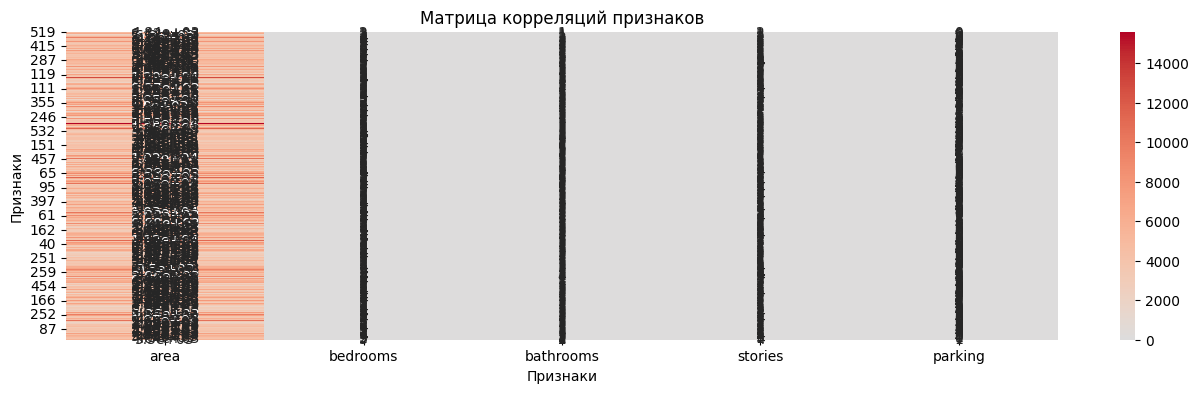

In [91]:
# Построить матрицу корреляций
corr_matrix = X_train[var_numeric] # ваш код здесь

plt.figure(figsize=(16, 4))
sns.heatmap(corr_matrix, fmt='.3g', cmap='coolwarm', center=0, annot=True)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.show()

In [16]:
data[var_numeric]

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [12]:
# Выполните кодирование категориальных и масштабирование количественных признаков (аналогично заданию 2).
# После этого соберите все в один датафрейм, переименуйте и удалите нужные колонки и сбросьте индексы в сериях целевой переменной

# ваш код здесь
encoder_train = OneHotEncoder(handle_unknown='ignore')
furnished_enc_train = pd.DataFrame(
    encoder_train.fit_transform(X_train[['furnishingstatus']]).toarray(),
    columns=encoder_train.categories_
)

encoder_test = OneHotEncoder(handle_unknown='ignore')
furnished_enc_test = pd.DataFrame(
    encoder_test.fit_transform(X_test[['furnishingstatus']]).toarray(),
    columns=encoder_test.categories_
)
print(furnished_enc_train.head(1))
print(furnished_enc_test.head(1))

  furnished semi-furnished unfurnished
0       0.0            0.0         1.0
  furnished semi-furnished unfurnished
0       0.0            0.0         1.0


In [13]:
furnished_enc_train['furnished'].value_counts()

(furnished,)
0.0             242
1.0              85
Name: count, dtype: int64

In [14]:
# Кодировка остальных категориальных признаков
X_train[var_categorical] = X_train[var_categorical].replace({'yes': 1, 'no': 0}) # ваш код здесь
X_test[var_categorical] = X_test[var_categorical].replace({'yes': 1, 'no': 0})
X_train.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
519,4840,2,1,2,1,0,0,0,0,0,0,unfurnished


In [15]:
# Теперь масштабируйте количественные признаки
scaler_train = StandardScaler()
X_sc_train = pd.DataFrame(
    scaler_train.fit_transform(X_train[var_numeric]),
    columns=var_numeric
)
scaler_test = StandardScaler()
X_sc_test = pd.DataFrame(
    scaler_test.fit_transform(X_test[var_numeric]),
    columns=var_numeric
)
X_sc_test.head(1)

,area,bedrooms,bathrooms,stories,parking
0,0.217373,1.395015,1.117818,0.150664,0.253445


In [17]:
# Соберите все в один датафрейм
X_train_new = X_sc_train.join([furnished_enc_train , X_train[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
X_test_new = X_sc_test.join([furnished_enc_test, X_test[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
print(X_train_new.shape)
print(X_test_new.shape)
X_train_new.head(1)

(327, 14)
(218, 14)


,area,bedrooms,bathrooms,stories,parking,"(furnished,)","(semi-furnished,)","(unfurnished,)",mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,-0.073972,-1.248938,-0.511306,0.279359,-0.777426,0.0,0.0,1.0,1,0,0,0,0,0


In [18]:
# Для удобства переименуйте колонки, получившиеся при кодировании признака 'furnishingstatus' и удалите одну лишнюю ('unfurnished')
X_train_new = X_train_new.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_test_new = X_test_new.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_train_new.head(1)

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,-0.073972,-1.248938,-0.511306,0.279359,-0.777426,0.0,0.0,1,0,0,0,0,0


In [ ]:
# Добавьте константы
X_train_sm = # ваш код здесь
X_test_sm = # ваш код здесь

In [19]:
# К обеим выборкам добавьте константу для работы с моделями из statsmodels, затем выполните сброс индексов в обеих сериях целевой переменной
# ваш код здесь
X_train_new = sm.add_constant(X_train_new)
X_test_new = sm.add_constant(X_test_new)
y_train = y_train.reset_index(drop=True) # ваш код здесь
y_test = y_test.reset_index(drop=True) # ваш код здесь

In [114]:
# Постройте модель линейной регрессии из statsmodels и, проанализировав ее выдачу,
# найдите признаки, не являющиеся важными для модели (p-value > 0.05) и сдайте ответ в форму.

In [21]:
# Постройте модели, обучите их на соответствующих выборках и выведите информацию о моделях
ols_train = sm.OLS(y_train, X_train_new) # ваш код здесь
ols_train_res = ols_train.fit() # ваш код здесь
print(ols_train_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     46.60
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           3.00e-65
Time:                        21:04:08   Log-Likelihood:                -4965.2
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     313   BIC:                         1.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.466e+06   1.67e+05     

In [23]:
from scipy.stats import pearsonr
pearson_coef, _ = pearsonr(data['bedrooms'], data['stories'])
pearson_coef

0.4085642375381514

In [30]:
p_values = ols_train_res.pvalues.drop('const')
not_useful_features = p_values[p_values > 0.05]

output = f"{pearson_coef:.3f}"
for feature, p_val in not_useful_features.items():
    output += f" {feature} {p_val:.3f}"
print(output)
not_useful_features

0.409 bedrooms 0.224


bedrooms    0.224239
dtype: float64

In [60]:
useful_features = p_values[p_values <= 0.05].keys().tolist()
useful_features
ufeat = p_values[p_values <= 0.05]
ufeat.sort_values(ascending=False)

guestroom          3.431751e-02
mainroad           2.047796e-02
semi-furnished     1.179999e-02
hotwaterheating    3.583710e-03
basement           2.071417e-03
furnished          1.288499e-03
prefarea           1.138365e-03
parking            3.728540e-04
stories            2.944154e-06
airconditioning    1.190878e-06
bathrooms          8.742910e-11
area               7.731690e-15
dtype: float64

#### Задание 5

Проверьте важность признаков. Для этого постройте регрессию только на площади квартиры и выберите в форме все верные ответы.

In [28]:
# Постройте регрессию из statsmodels только на площади (не забудьте добавить константы)
# ваш код здесь
X_train_area = sm.add_constant(X_train_new['area'])
X_test_area = sm.add_constant(X_test_new['area'])
print(X_train_area.shape, X_test_area.shape)
print(y_train.shape, y_test.shape)
X_train_area.head(1), X_test_area.head(1)

(327, 2) (218, 2)
(327,) (218,)


(   const      area
 0    1.0 -0.073972,
    const      area
 0    1.0  0.217373)

In [29]:
ols_area = sm.OLS(y_train, X_train_area) # ваш код здесь
ols_area_res = ols_area.fit() # ваш код здесь
print(ols_area_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           2.31e-25
Time:                        21:07:16   Log-Likelihood:                -5086.7
No. Observations:                 327   AIC:                         1.018e+04
Df Residuals:                     325   BIC:                         1.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.598e+06   7.65e+04     60.115      0.0

In [ ]:
# Теперь постройте регрессию на всех признаках, кроме неважных
# ваш код здесь
X_train_useful = sm.add_constant(X_train_new[useful_features])
X_test_useful = X_test_new[useful_features]
print(X_train_useful.shape, X_test_useful.shape)
X_train_useful.head(1)

(327, 12) (218, 12)


,area,bathrooms,stories,parking,furnished,semi-furnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,-0.073972,-0.511306,0.279359,-0.777426,0.0,0.0,1,0,0,0,0,0


In [48]:
# Анализируя выдачу statsmodels, выберите все верные ответы
ols_useful = sm.OLS(y_train, X_train_useful) # ваш код здесь
ols_useful_res = ols_useful.fit() # ваш код здесь
print(ols_useful_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              262.4
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                   5.57e-156
Time:                        21:22:06   Log-Likelihood:                         -5107.9
No. Observations:                 327   AIC:                                  1.024e+04
Df Residuals:                     315   BIC:                                  1.029e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

#### Задание 6

Каково примерное изменение стоимости дома при увеличении количества этажей на два (разумеется, при прочих равных)? Теория предписывает анализ коэффициента линейной регрессии. В качестве ответа выбрать значение, максимально близкое к полученному Вами теоретически, и значение, максимально совпадающее с полученным путем изменения данных.

In [ ]:
# В этом задании признак 'bedrooms' оставьте

In [86]:
print(data.shape)
X_data, y_data = data.drop('price', axis=1), data['price']
data.head(1)

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [88]:
# Создайте датафрейм, в котором количество этажей в каждом доме будет больше на два
dfs = data.copy() # ваш код здесь
dfs['stories'] = dfs['stories'] + 2
X_dfs, y_dfs = dfs.drop('price', axis=1), dfs['price'] # ваш код здесь
dfs.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,5,yes,no,no,no,yes,2,yes,furnished


In [80]:
# Создайте списки категориальных и количественных переменных
var_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # ваш код здесь
var_numeric = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # ваш код здесь

In [ ]:
# Разделите данные на тренировочную и тестовую выборки. ВАЖНО: здесь и везде далее, где это возможно, указывать параметр random_state=RANDOM_STATE.
# Размер тестовой выборки 0.4, перемешивание данных должно быть включено (параметр shuffle)
# X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_dfs, y_dfs, test_size=0.4, shuffle=True, random_state=RANDOM_STATE) # ваш код здесь

In [89]:
# Закодируйте категориальные и масштабируйте количественные признаки в обоих датафреймах
# ваш код здесь
s_encoder_data = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(
    s_encoder_data.fit_transform(X_data[['furnishingstatus']]).toarray(),
    columns=s_encoder_data.categories_
)

s_encoder_stories = OneHotEncoder(handle_unknown='ignore')
enc_stories = pd.DataFrame(
    s_encoder_stories.fit_transform(X_dfs[['furnishingstatus']]).toarray(),
    columns=s_encoder_stories.categories_
)
print(enc_data.head(2))
print(enc_stories.head(2), '\n')

# Кодировка остальных категориальных признаков
X_data[var_categorical] = X_data[var_categorical].replace({'yes': 1, 'no': 0}) # ваш код здесь
X_dfs[var_categorical] = X_dfs[var_categorical].replace({'yes': 1, 'no': 0})
print(X_data.head(1))

  furnished semi-furnished unfurnished
0       1.0            0.0         0.0
1       1.0            0.0         0.0
  furnished semi-furnished unfurnished
0       1.0            0.0         0.0
1       1.0            0.0         0.0 

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   

   hotwaterheating  airconditioning  parking  prefarea furnishingstatus  
0                0                1        2         1        furnished  


In [90]:
# Теперь масштабируйте количественные признаки
scaler_data = StandardScaler()
data_num_s = pd.DataFrame(
    scaler_data.fit_transform(X_data[var_numeric]),
    columns=var_numeric
)
scaler_dfs = StandardScaler()
dfs_num_s = pd.DataFrame(
    scaler_dfs.fit_transform(X_dfs[var_numeric]),
    columns=var_numeric
)
data_num_s.head(1)

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692


In [91]:
# Соберите все в один датафрейм
X_train_data = data_num_s.join([enc_data , X_data[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
X_train_stories = dfs_num_s.join([enc_stories, X_dfs[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
print(X_train_data.shape)
print(X_train_stories.shape)
X_train_stories.head(1)

(545, 14)
(545, 14)


,area,bedrooms,bathrooms,stories,parking,"(furnished,)","(semi-furnished,)","(unfurnished,)",mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.0,0.0,0.0,1,0,0,0,1,1


In [92]:
# Для удобства переименуйте колонки, получившиеся при кодировании признака 'furnishingstatus' и удалите одну лишнюю ('unfurnished')
X_train_data = X_train_data.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_train_stories = X_train_stories.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_train_data.head(1)

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.0,0.0,1,0,0,0,1,1


In [ ]:
# Не забудьте добавить константы и постройте модель регрессии из statsmodels, обучите ее на исходном наборе (data_sm)

data_sm = sm.add_constant(X_train_data) # ваш код здесь
df_sm = sm.add_constant(X_train_stories) # ваш код здесь

ols_model_data = sm.OLS(y_data, data_sm).fit() # ваш код здесь
print(ols_model_data.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          9.07e-123
Time:                        22:33:00   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.506e+06   1.46e+05     

In [119]:
ols_model_data.params['stories'] * 2

781496.531349604

In [121]:
# Выполните предсказания на обоих наборах данных (data_sm и df_sm) и вычислите эффект наличия +2 этажей.
# Сравните результаты и сделайте выводы
y_pred_data = ols_model_data.predict(data_sm) # ваш код здесь
y_pred_stories = ols_model_data.predict(df_sm) # ваш код здесь
# diff = y_pred_stories - y_pred_data
y_pred_stories

0      8133305
1     10561027
2      7626588
3      8329202
4      6693878
        ...   
540    3357640
541    2365240
542    2604686
543    2536096
544    3226473
Length: 545, dtype: float64

In [122]:
pd.set_option('float_format', '{:.0f}'.format)
prices_compare = pd.DataFrame({'price_orig': y_data, 'predict_orig': y_pred_data, 'price_stories': y_pred_stories})
prices_compare['diff'] = prices_compare['price_stories'] - prices_compare['price_orig']
prices_compare

,price_orig,predict_orig,price_stories,diff
0,13300000,8133305,8133305,-5166695
1,12250000,10561027,10561027,-1688973
2,12250000,7626588,7626588,-4623412
3,12215000,8329202,8329202,-3885798
4,11410000,6693878,6693878,-4716122
...,...,...,...,...
540,1820000,3357640,3357640,1537640
541,1767150,2365240,2365240,598090
542,1750000,2604686,2604686,854686
543,1750000,2536096,2536096,786096


In [123]:
prices_compare.describe()

,price_orig,predict_orig,price_stories,diff
count,545,545,545,545
mean,4766729,4766729,4766729,-0
std,1870440,1544446,1544446,1055097
min,1750000,2007675,2007675,-5166695
25%,3430000,3540201,3540201,-507176
50%,4340000,4543846,4543846,68409
75%,5740000,5904136,5904136,657322
max,13300000,10561027,10561027,2619718


#### Задание 7

Теперь займемся проверкой допущений. Для начала проверим отсутствие мультиколлинеарности. Это можно сделать с помощью VIF (Variance Inflation Factor). Если он будет больше 4 (договорное значение, аналогичное p-value), то эта переменная коррелирует с какой-то из присутствующих, и ее нужно убрать.

Рассчитайте VIF для всех колонок и найдите те, которые коррелируют (не забудьте создать 'special_index'). После этого постройте две регрессии: с одним из коррелирующих признаков и с обоими (все остальные признаки тоже включаем, конечно). Выберите все верные ответы из списка.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Снова считайте набор данных house_prices.csv, разделите его на тренировочную и тестовую выборки,
# закодируйте категориальные и масштабируйте количественнные признаки

data = pd.read_csv('house_prices.csv') # ваш код здесь

In [9]:
# random_state=RANDOM_STATE, перемешивание включено, размер тестовой выборки 0.4
X, y = data.drop('price', axis=1), data['price'] # ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=RANDOM_STATE) # ваш код здесь

In [6]:
# Создайте списки категориальных и количественных переменных
var_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # ваш код здесь
var_numeric = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # ваш код здесь

In [10]:
# Кодировка категориальных признаков
X_train[var_categorical] = X_train[var_categorical].replace({'yes': 1, 'no': 0}) # ваш код здесь
X_test[var_categorical] = X_test[var_categorical].replace({'yes': 1, 'no': 0})
X_train.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
519,4840,2,1,2,1,0,0,0,0,0,0,unfurnished


In [11]:
# Выполните кодирование категориальных и масштабирование количественных признаков (аналогично заданию 2).
# После этого соберите все в один датафрейм, переименуйте и удалите нужные колонки и сбросьте индексы в сериях целевой переменной

# ваш код здесь
encoder_train = OneHotEncoder(handle_unknown='ignore')
furnished_enc_train = pd.DataFrame(
    encoder_train.fit_transform(X_train[['furnishingstatus']]).toarray(),
    columns=encoder_train.categories_
)

encoder_test = OneHotEncoder(handle_unknown='ignore')
furnished_enc_test = pd.DataFrame(
    encoder_test.fit_transform(X_test[['furnishingstatus']]).toarray(),
    columns=encoder_test.categories_
)
print(furnished_enc_train.head(1))
print(furnished_enc_test.head(1))

  furnished semi-furnished unfurnished
0       0.0            0.0         1.0
  furnished semi-furnished unfurnished
0       0.0            0.0         1.0


In [12]:
# Теперь масштабируйте количественные признаки
scaler_train = StandardScaler()
X_sc_train = pd.DataFrame(
    scaler_train.fit_transform(X_train[var_numeric]),
    columns=var_numeric
)
scaler_test = StandardScaler()
X_sc_test = pd.DataFrame(
    scaler_test.fit_transform(X_test[var_numeric]),
    columns=var_numeric
)
X_sc_test.head(1)

,area,bedrooms,bathrooms,stories,parking
0,0.217373,1.395015,1.117818,0.150664,0.253445


In [17]:
# Соберите все в один датафрейм
X_train_new = X_sc_train.join([furnished_enc_train , X_train[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
X_test_new = X_sc_test.join([furnished_enc_test, X_test[var_categorical].reset_index(drop=True)])#.drop('furnishingstatus', axis=1)
print(X_train_new.shape)
print(X_test_new.shape)
X_train_new.head(1)

(327, 14)
(218, 14)


,area,bedrooms,bathrooms,stories,parking,"(furnished,)","(semi-furnished,)","(unfurnished,)",mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,-0.073972,-1.248938,-0.511306,0.279359,-0.777426,0.0,0.0,1.0,1,0,0,0,0,0


In [18]:
# Для удобства переименуйте колонки, получившиеся при кодировании признака 'furnishingstatus' и удалите одну лишнюю ('unfurnished')
X_train_enc = X_train_new.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_test_enc = X_test_new.rename(columns={('semi-furnished',): 'semi-furnished',
                                          ('furnished',): 'furnished' }).drop(('unfurnished',), axis=1) # ваш код здесь
X_train_enc.head(1)

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,-0.073972,-1.248938,-0.511306,0.279359,-0.777426,0.0,0.0,1,0,0,0,0,0


In [19]:
# К обеим выборкам добавьте константу для работы с моделями из statsmodels, затем выполните сброс индексов в обеих сериях целевой переменной
# ваш код здесь
X_train_enc = sm.add_constant(X_train_enc)
X_test_enc = sm.add_constant(X_test_enc)
y_train = y_train.reset_index(drop=True) # ваш код здесь
y_test = y_test.reset_index(drop=True) # ваш код здесь

In [21]:
# Добавление колонки и удаление незначимого признака

X_train_enc = X_train_enc.drop('bedrooms', axis=1)
X_train_enc['special_index'] = X_train_enc['stories'] * 2 + 0.5

In [30]:
# Вычислите VIF и найдите коррелирующие признаки
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_enc.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_enc.values, i)
                   for i in range(X_train_enc.shape[1])] # ваш код здесь
print("VIF для признаков:")
vif_data

VIF для признаков:


,feature,VIF
0,const,0.000000
1,area,1.330976
2,bathrooms,1.184137
3,stories,inf
4,parking,1.172669
5,furnished,1.463278
6,semi-furnished,1.400335
7,mainroad,1.177293
8,guestroom,1.297299
9,basement,1.368774


In [28]:
# Постройте регрессию из statsmodels, обучите ее на выборке без одного из коррелирующих признаков.
# Проделайте то же самое на выборке со всеми признаками.

# ваш код здесь
model_1 = sm.OLS(y_train, X_train_enc.drop('special_index', axis=1)) # ваш код здесь
print('Модель с одним коррелирующим признаком:')
print(model_1.fit().summary())

Модель с одним коррелирующим признаком:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     50.29
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.54e-66
Time:                        21:29:27   Log-Likelihood:                -4966.0
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     314   BIC:                         1.001e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

In [29]:
model2 = sm.OLS(y_train, X_train_enc).fit()
print("\nМодель с обоими коррелирующими признаками (stories и special_index):")
print(model2.summary())


Модель с обоими коррелирующими признаками (stories и special_index):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     50.29
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.54e-66
Time:                        21:33:40   Log-Likelihood:                -4966.0
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     314   BIC:                         1.001e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

#### Задание 8

С помощью теста Уайта проверить отсутствие гетероскедастичности, то есть равенства дисперсий ошибок. В качестве ответа сдать p-value этого теста.

О тесте Уайта. В качестве нулевой гипотезы примем равенство дисперсий ошибок. Альтернатива, соответственно, будет за нарушение этого равенства. Если мы будем вынуждены отвергнуть нулевую гипотезу ($p-value < 0.05$), то можно будет сделать вывод о присутствии гетероскедастичности в наших данных.

Суть теста в следующем. Часто гетероскедастичность модели вызвана зависимостью (возможно, довольно сложной) дисперсий ошибок от признаков. На основе этого факта можно провести тест без каких-либо предположений о структуре гетероскедастичности. Сначала к исходной модели применяется обычный метод наименьших квадратов и находятся остатки регрессии $e_t$. Затем осуществляется регрессия квадратов этих остатков $e_t^2$ на все признаки, их квадраты, попарные произведения и константу. Тогда при гипотезе $H_0$ величина $NR^2$ асимптотически имеет распределение $\chi^2(N-1)$, где $R^2$ — коэффициент детерминации, а $N$ — число регрессоров второй регрессии. Плюс данного теста — его универсальность. Минусы : 1) если гипотеза $H_0$ отвергается, то никаких указаний на функциональную форму гетероскедастичности мы не получаем; 2) поиск вида регрессии вслепую (начинаем приближать простыми полиномами второй степени без какой бы то ни было причины на это)

In [31]:
# Для проведения теста Уайта постройте линейную регрессию, предварительно удалив признаки 'bedrooms' и 'special_index'
ols_model = sm.OLS(y_train, X_train_enc.drop('special_index', axis=1)) # ваш код здесь
ols_res = ols_model.fit() # ваш код здесь
print('Модель с одним коррелирующим признаком:')
print(ols_res.summary())
# ваш код здесь

Модель с одним коррелирующим признаком:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     50.29
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.54e-66
Time:                        22:02:54   Log-Likelihood:                -4966.0
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     314   BIC:                         1.001e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

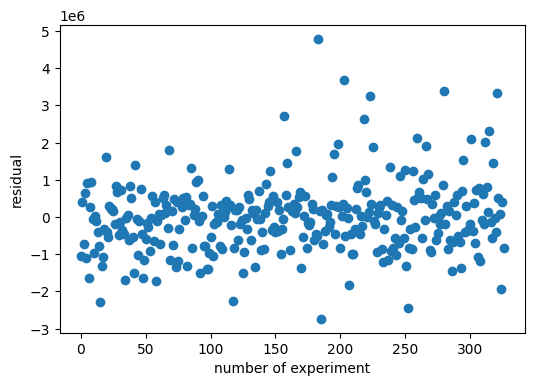

In [32]:
# Постройте график остатков от номера эксперимента
plt.figure(figsize=(6, 4))
plt.xlabel('number of experiment')
plt.ylabel('residual')
plt.scatter(x=list(range(ols_res.resid.shape[0])), y=ols_res.resid)
plt.show()

In [36]:
ols_res.model.exog

array([[ 1.        , -0.07397199, -0.51130554, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.70464408, -0.51130554, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -1.40205447, -0.51130554, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , -0.24152229,  1.7179866 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.46820798, -0.51130554, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.2512727 ,  1.7179866 , ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
# Проведите тест Уайта
white_test = het_white(
    ols_res.resid, ols_res.model.exog # ваш код здесь
)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

for label, value in zip(labels, white_test):
    print(f'{label}: {value}')

Test Statistic: 144.51116561282157
Test Statistic p-value: 1.348069635311806e-05
F-Statistic: 2.4350631409953687
F-Test p-value: 8.341578725445716e-08


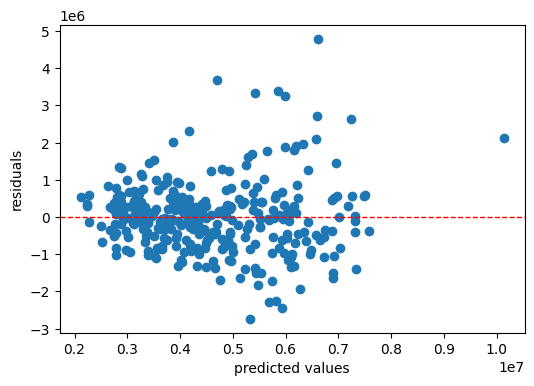

In [43]:
# Постройте график остатков регрессии от предсказанных значений
# ваш код здесь
x_pred = ols_res.predict(X_train_enc.drop('special_index', axis=1))
residuals = ols_res.resid
plt.figure(figsize=(6, 4))
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.scatter(x=x_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [ ]:
# Сдайте результат в форму

#### Задание 9

Имеется набор данных о заболевании сахарным диабетом. В качестве признаков выступают пол, ИМТ и другие. Целевая переменная - некоторый медицинский показатель, связанный со степенью диабета. Проверить наличие мультиколлинеарности в данных. Построить обычную регрессию и посмотреть на ее коэффициенты при коррелирующих признаках. Затем построить регрессию с L1-регуляризацией (LASSO) и убедиться, что коэффициенты при коррелирующих признаках стремятся к нулю. В качестве ответа выберите признаки, при которых модель LASSO-регрессии занулила коэффициенты.

In [5]:
# Загрузите набор данных
from sklearn import datasets

diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

df['diabetes_measure'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [43]:
# Нормируйте целевой признак на максимальное значение и разбейте данные на тренировочную и тестовую выборки.
# Размер тестовой выборки 0.25, перемешивание включено, random_state=RANDOM_STATE
X, y = df.drop('diabetes_measure', axis=1), df['diabetes_measure'] # ваш код здесь
y_scale = df['diabetes_measure'] / df['diabetes_measure'].max()
X_train, X_test, y_train, y_test = train_test_split(X, y_scale, test_size=0.25, random_state=RANDOM_STATE) # ваш код здесь

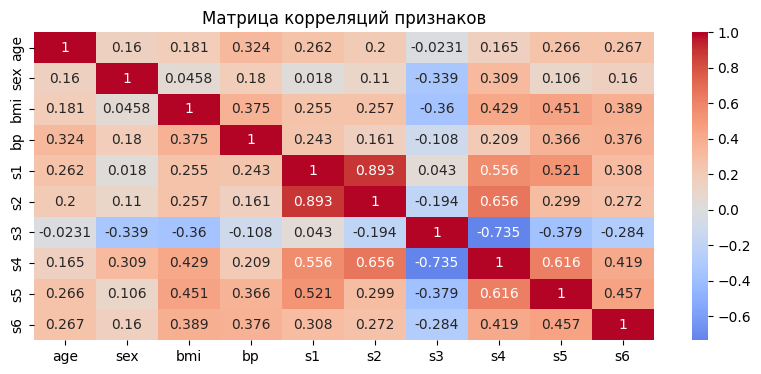

In [47]:
# Постройте матрицу корреляций
# ваш код здесь
corr_matrix = X_train.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, fmt='.3g', cmap='coolwarm', center=0, annot=True)
plt.title('Матрица корреляций признаков')
plt.show();

In [48]:
# Построить регрессию из sklearn, обучить ее и рассчитать метрику RMSE, используя функцию cross_val_score
lin_reg = LinearRegression() # ваш код здесь
lin_reg.fit(X_train, y_train)

rmse = cross_val_score(
    estimator=lin_reg,
    X=X_train,
    y=y_train,
    scoring='neg_root_mean_squared_error',
    cv=10
)

-rmse.mean()

0.1609147410141368

In [49]:
# Выполнить предсказания и вывести метрики с помощью функции metrics_report
# ваш код здесь
y_pred_test = lin_reg.predict(X_test)
metrics_report(y_test, y_pred_test)

R2 score: 0.4849058889476756
RMSE: 0.15424730263098832
MAE: 0.12008238976844104
MAPE: 0.37310970433744683


In [50]:
# Вывести отсортированные коэффициенты регрессии
coefs = []
for i in range(len(X_train.columns)):
    col = X_train.columns[i]
    coef = lin_reg.coef_[i]
    coefs.append((col, coef))

coefs.sort(key=lambda x: x[1], reverse=True)
for i in range(len(coefs)):
    print(f'{coefs[i][0]} : {coefs[i][1] : .2f}')

s5 :  2.01
bmi :  1.54
s2 :  1.47
bp :  1.10
s4 :  0.78
s3 :  0.34
age :  0.14
s6 :  0.08
sex : -0.70
s1 : -2.65


In [53]:
# Построить регрессию с L1-регуляризацией, осуществить автоматический поиск оптимальных гиперпараметров с помощью GridSearchCV.
# Обучить регрессию с оптимальными параметрами и, выведя ее коэффициенты, выяснить, какие признаки модель занулила
lasso = Lasso() # ваш код здесь

params = {'alpha' : [0.001, 0.009, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}

clf = GridSearchCV(lasso, params, scoring='neg_root_mean_squared_error', cv=5)
# ваш код здесь
clf.fit(X_train, y_train)
best_alpha = clf.best_params_['alpha']
print(f'Лучший параметр alpha: {best_alpha}')

Лучший параметр alpha: 0.001


In [54]:
lasso_opt = Lasso(alpha=best_alpha) # ваш код здесь (регрессия с L1-регуляризацией с оптимальными параметрами)
lasso_opt.fit(X_train, y_train)

Lasso(alpha=0.001)

In [55]:
# Аналогично случаю обычной регрессии выведите коэффициенты модели для всех признаков, чтобы найти те, которые модель занулила
# Сдайте ответ в форме
# ваш код здесь
coefs_lasso = []
for i in range(len(X_train.columns)):
    col = X_train.columns[i]
    coef_lasso = lasso_opt.coef_[i]
    coefs_lasso.append((col, coef_lasso))

coefs_lasso.sort(key=lambda x: x[1], reverse=True)
for i in range(len(coefs_lasso)):
    print(f'{coefs_lasso[i][0]} : {coefs_lasso[i][1] : .2f}')

bmi :  1.50
s5 :  0.99
bp :  0.67
age :  0.00
sex : -0.00
s1 : -0.00
s2 : -0.00
s4 :  0.00
s6 :  0.00
s3 : -0.45


<BarContainer object of 10 artists>

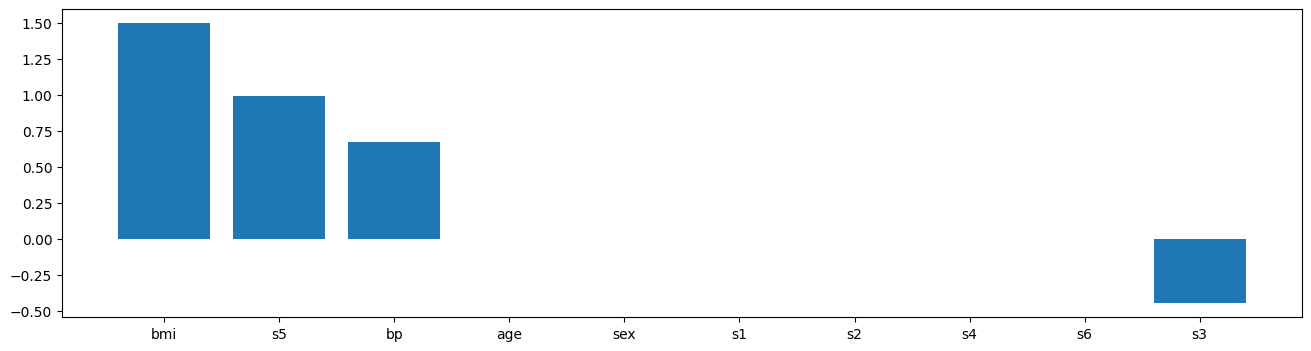

In [56]:
plt.figure(figsize=(16, 4))
plt.bar([x[0] for x in coefs_lasso], [x[1] for x in coefs_lasso])

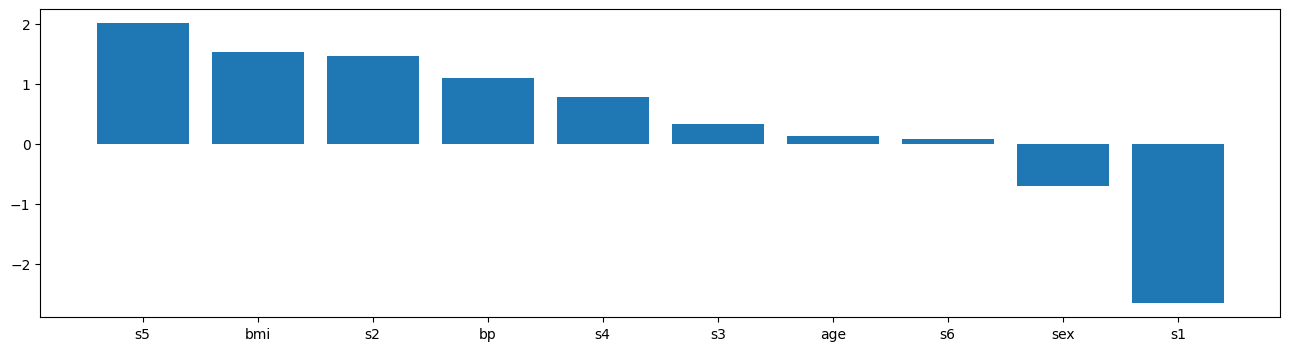

In [57]:
plt.figure(figsize=(16, 4))
plt.bar([x[0] for x in coefs], [x[1] for x in coefs]);

#### Задание 10

Рассмотрим все тот же набор данных о заболевании диабетом. Только теперь добавился еще один признак 's7'. Построить регрессию, затем применить регуляризацию и в качестве ответа сдать соответствующие коэффициенты детерминации, рассчитанные на тестовой выборке. Ответ округлить до третьего знака.

<u>Формат ответа:</u> lin_reg_r2 ridge_r2 lasso_r2

In [58]:
# Загрузите набор данных
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

df['diabetes_measure'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [59]:
# Нормируйте целевой признак на максимальное значение и разбейте данные на тренировочную и тестовую выборки.
# Размер тестовой выборки 0.25, перемешивание включено, random_state=RANDOM_STATE
X, y = df.drop('diabetes_measure', axis=1), df['diabetes_measure'] # ваш код здесь
y_scaled = df['diabetes_measure'] / df['diabetes_measure'].max()
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.25, random_state=RANDOM_STATE) # ваш код здесь

In [14]:
print(y)
print(y_scaled)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetes_measure, Length: 442, dtype: float64
0      0.436416
1      0.216763
2      0.407514
3      0.595376
4      0.390173
         ...   
437    0.514451
438    0.300578
439    0.381503
440    0.635838
441    0.164740
Name: diabetes_measure, Length: 442, dtype: float64


In [60]:
X_train['s7'] = np.sin(X_train['s3']) + X_train['s3'] ** 2 + X_train['s3']
X_test['s7'] = np.sin(X_test['s3']) + X_test['s3'] ** 2 + X_test['s3']

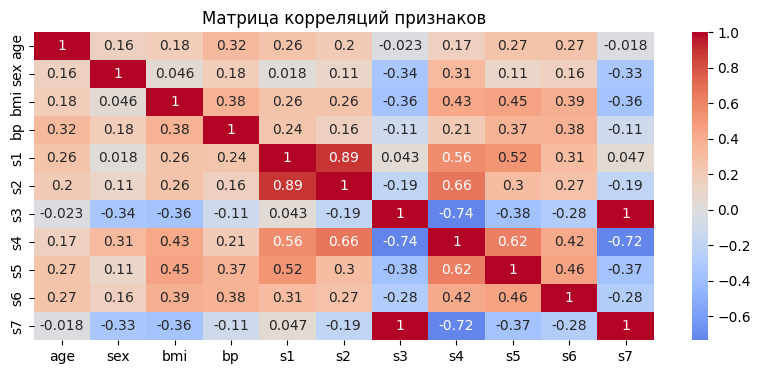

In [61]:
# Постройте матрицу корреляций
# ваш код здесь
corr_matrix = X_train.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, fmt='.2g', cmap='coolwarm', center=0, annot=True)
plt.title('Матрица корреляций признаков')
plt.show();

In [62]:
# Постройте линейную регрессию из sklearn и оцените качество модели с помощью кросс-валидации, как в задании выше
lin_reg = LinearRegression() # ваш код здесь
lin_reg.fit(X_train, y_train)

rmse = cross_val_score(
    estimator=lin_reg,
    X=X_train,
    y=y_train,
    scoring='neg_root_mean_squared_error',
    cv=10
)

-rmse.mean()

0.16086826334398505

In [63]:
# Выполните предсказания на тренировочной и на тестовой выборках и по значениям коэффициента детерминации убедитесь в присутствии переобучения

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Вычислите коэффициент детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² на тестовой выборке:", r2_test)

R² на тестовой выборке: 0.46928407246725157


In [64]:
# Постройте регрессию с L2-регуляризацией, выполните предсказания на тренировочной и тестовой выборках (не забывайте про random_state)
ridge = Ridge(random_state=RANDOM_STATE) # ваш код здесь

params = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0], 'solver' : ['saga', 'svd', 'lsqr']}

clf = GridSearchCV(ridge, params, scoring='neg_root_mean_squared_error', cv=5)
# ваш код здесь
clf.fit(X_train, y_train)
best_alpha = clf.best_params_['alpha']
best_solver = clf.best_params_['solver']
print(f'Лучший параметр alpha: {best_alpha}')
print(f'Лучший параметр solver: {best_solver}')

Лучший параметр alpha: 0.001
Лучший параметр solver: svd


In [66]:
# Обучите регрессию с оптимальными параметрами и выполните предсказания
# ваш код здесь
best_ridge = Ridge(alpha=0.001, solver='svd')
best_ridge.fit(X_train, y_train)
y_rigde_train_pred = best_ridge.predict(X_train)
y_ridge_test_pred = best_ridge.predict(X_test)

r2_ridge_train = r2_score(y_train, y_rigde_train_pred)
r2_ridge_test = r2_score(y_test, y_ridge_test_pred)

print("R² на тестовой выборке:", r2_ridge_test)


R² на тестовой выборке: 0.48111150693858495


In [27]:
coefs_ridge = []
for i in range(len(X_train.columns)):
    col = X_train.columns[i]
    coef_ridge = best_ridge.coef_[i]
    coefs_ridge.append((col, coef_ridge))

coefs_ridge.sort(key=lambda x: x[1], reverse=True)
for i in range(len(coefs_ridge)):
    print(f'{coefs_ridge[i][0]} : {coefs_ridge[i][1] : .2f}')

s5 :  1.89
bmi :  1.54
s2 :  1.26
s7 :  1.18
bp :  1.10
s4 :  0.60
age :  0.13
s6 :  0.08
sex : -0.70
s3 : -2.30
s1 : -2.30


In [67]:
# Аналогично с LASSO-регрессией
# ваш код здесь
lasso_10 = Lasso(random_state=RANDOM_STATE) # ваш код здесь

params = {'alpha' : [0.001, 0.009, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}

clf_las = GridSearchCV(lasso_10, params, scoring='neg_root_mean_squared_error', cv=5)
# ваш код здесь
clf_las.fit(X_train, y_train)
best_alpha = clf_las.best_params_['alpha']
print(f'Лучший параметр alpha: {best_alpha}')

Лучший параметр alpha: 0.001


In [69]:
best_lasso = Lasso(random_state=RANDOM_STATE, alpha=0.001)
best_lasso.fit(X_train, y_train)
y_lasso_train_pred = best_lasso.predict(X_train)
y_lasso_test_pred = best_lasso.predict(X_test)

r2_lasso_train = r2_score(y_train, y_lasso_train_pred)
r2_lasso_test = r2_score(y_test, y_lasso_test_pred)

print("R² на тестовой выборке:", r2_lasso_test)

R² на тестовой выборке: 0.4798491607639962


In [26]:
coefs_lasso = []
for i in range(len(X_train.columns)):
    col = X_train.columns[i]
    coef_lasso = best_lasso.coef_[i]
    coefs_lasso.append((col, coef_lasso))

coefs_lasso.sort(key=lambda x: x[1], reverse=True)
for i in range(len(coefs_lasso)):
    print(f'{coefs_lasso[i][0]} : {coefs_lasso[i][1] : .2f}')

bmi :  1.42
s5 :  0.92
bp :  0.70
age :  0.00
s1 : -0.00
s2 : -0.00
s3 : -0.00
s4 :  0.00
s6 :  0.00
sex : -0.02
s7 : -0.36


In [70]:
# Ответ:
print(f'{r2_test: .3f} {r2_ridge_test: .3f} {r2_lasso_test: .3f}')

 0.469  0.481  0.480
